Videos del tema:

https://www.youtube.com/watch?v=9g32v7bK3Co&t=4295s

https://www.youtube.com/watch?v=HpaHTfY52RQ&t=714s

# Aprendizaje por Refuerzo
Los métodos de aprendizaje por refuerzo son utilizados para realizar una secuencia de decisiones o acciones en ambientes desconocidos. Por lo general, se presenta como un **agente** (el aprendiz) interactuando con un entorno que le proporciona **recompensas** o refuerzos (positivos o negativos), basados en las decisiones del agente. El agente aprovecha este refuerzo para actualizar su comportamiento con el objetivo de acercarse a actuar de manera óptima, es decir a maximizar la recompensa. Al interactuar con el entorno desconocido, el agente también está aprendiendo sobre la dinámica del sistema subyacente.

##Procesos de decisión Markovianos

A menudo, para modelar problemas secuenciales de toma
de decisiones se usan **procesos de decisión de Markov (MDP)**

**Ejemplo:** Juego de Dados
En cada ronda **r=1,2,...**
- Elija la acción ***seguir*** o ***salir***
- Si decide ***salir***, ganas \$10 y el juego finaliza
- Si decide ***seguir***, ganas \$4 y lanzas un dado de 6 caras:
    - Si el resultado del dado es 1 o 2, el juego finaliza
    - Con cualquier otro resultado, el juego continúa a la siguiente ronda


### **¿Cómo representamos este juego usando MDP?**




Un MDP queda definido por:
- $\mathcal{S}$ es un conjunto de *estados* que representan las posibles situaciones en las que puede encontrarse el agente.
- $\mathcal{A}$ es un conjunto finito de *acciones* que el agente puede realizar desde cada estado.
- $R$ Función de recompensa (o costo) que proporciona al agente un refuerzo (positivo o negativo).  $R(s,a,s’)$
- $P$ Modelo o función de transición. Función que recibe un estado y una acción y devuelve una distribución de los siguientes posibles estados. Esta distribución puede ser determinística o probabilística donde $P(s, a, s')$ sería la probabilidad de terminar en el estado $s'$ después de tomar la acción $a$ desde el estado $s$.
- $\gamma\in[0, 1)$ número entre 0 y 1 y es un factor que "descuenta" la recompensa en cada paso que realiza el agente por lo que lo motiva en alcanzar su estado óptimo en la menor cantidad de pasos posibles.

### Política $\pi(s)$
La solución de un MDP está dada por la noción de política $\pi(s)$

Una **política $\pi$** es el mapeo de cada uno de los estados ($s \in S$ ) a una acción $a \in A$(s) : $\pi:\mathcal{S}\rightarrow\Delta(\mathcal{A})$, y codifica el *comportamiento* del agente. La política toma un estado y nos devuelve la acción potencial a realizar para ese estado.

A diferencia de un problema determinístico donde si se sigue un camino llego siempre a un mismo estado, en un proceso de decisión de markov, la política me dice que acción tomar en cada estado pero esto no me asegura que siempre llegaré al mismo estado debido a la naturaleza probabilística de la función de transición

### Evaluación de la política

Como sabemos, seguir una **política** me produce un camino aleatorio y en cada ejecución de la política obtendré caminos distintos.

Sea el camino $s_0, a_1r_1s_1,a_2r_2s_2,…a_nr_ns_n$ (acción, recompensa, nuevo estado). La **Utilidad** con descuento $\gamma$ es:

$$
u_1=r_1+\gamma r_2 + \gamma^2 r_3 + ... + \gamma^n r_n
$$

La utilidad de una política es la suma (descontada) de las recompensas a lo largo de un camino (cantidad aleatoria). Al ser una variable aleatoria no la puedo optimizar, necesito algo que pueda optimizar para evaluar qué tan óptima es mi política.

Para esto utilizamos el **Valor de la política**, el cual es la utilidad esperada de la política. Como la política está definida como una función de $s$; el valor también es función del estado $V^{\pi}(s)$.

El **Valor-Q**:  $Q_{\pi}(s,a)$ es la recompensa esperada de tomar la acción $a$ en el estado $s$ y seguir la política $\pi$

$$V^{\pi}(s) = \sum_{s'}P(s,a,s')\left[R(s, a, s') + \gamma V^{\pi}(s')\right]$$

Existe un algoritmo en recurrencias para obtener el Valor de la política, llamado **policy Evaluation**. No lo vemos en la práctica.

### Política óptima

Si se nos proporciona una política $\pi$, ahora sabemos cómo calcular su valor $V_{\pi}$. Entonces, podríamos simplemente enumerar todas las políticas, calcular el valor de cada una y tomar la mejor política, pero el número de políticas es exponencial al número de estados ($\mathcal{A}^{\mathcal{S}}$ para ser exactos), por lo que necesitamos algo un poco más inteligente.

Entonces ahora queremos encontrar $V_{opt}(s)$ que es el **Valor óptimo** entre los valores de las políticas. Para esto existe un algortimo en recurrencias **Value Iteration**

**Algoritmo:**

Inicializar $V_{opt}^{(0)}(s) \leftarrow 0 \quad\forall \; s$



*   For iteración  $t=1, … t_{VI}$:
    *   For $s$ in $S$:
        *  $V_{opt}^{(t)}(s) \leftarrow \max_{a \in A(s)}\sum_{s'}P(s,a,s')\left[R(s, a, s') + \gamma V_{opt}^{(t-1)}(s')\right]$

        (Equivalente a $V_{opt}^{(t)}(s) \leftarrow Q^{(t-1)}(s, a)$)


Entonces la política óptima será:

$$
\pi_{opt}(s) =  \arg\underset{a \in A(s)}\max Q_{opt}(s,a)
$$


Cuántas iteraciones deberíamos tener?

Podemos aplicar la ecuación de recurrencia hasta que los valores del paso anterior y el actual no difieran tanto entre sí. Es decir, calculamos la diferencia entre los Valores para todos los posibles estados y tomamos el máximo para compararlo con el valor de tolerancia adoptado.

$$
\max_{s\in S}|V_{opt}^{(t)}(s) - V_{opt}^{(t-1)}(s)|\leq \epsilon
$$


### Ejercicio de Aplicación de MDP

In [47]:
"""
Una avenida de N cuadras enumeradas de 1 a n, caminar de una cuadra a la siguiente (s a s+1) toma 1 minuto
y tomar un tranvía desde s a 2s toma 2 minutos. Cómo viajar de 1 a n en el menor tiempo posible?
El tranvía puede fallar con probabilidad de 0.5, en cuyo caso no nos movemos y perdimos 2 minutos.
"""

class TransportationMDP:
    def __init__(self, N):
        self.N = N

    def estado_inicial(self):
        return 1

    def finalizo(self, estado):
        return estado == self.N

    def acciones(self, estado):
        # Retorna la lista de acciones posibles en el estado
        result = []
        if estado + 1 <= self.N:
            result.append('caminar')
        if estado * 2 <= self.N:
            result.append('tranvia')
        return result

    def succ_prob_rec(self, estado, accion):
        # Retorna una lista de tuplas (estado_nuevo, prob, recompensa)
        result = []
        if accion == 'caminar':
            result.append( (estado + 1, 1, -1) )
        elif accion == 'tranvia':
            prob_falla = 0
            if estado * 2 <= self.N:
                result.append( (estado * 2, 1 - prob_falla, -2) )
            result.append( (estado, prob_falla, -2) )
        return result

    def estados(self):
        return list(range(1, self.N + 1))

    def descuento(self):
        return 1

In [48]:
mdp = TransportationMDP(10)
print("Estado inicial:", mdp.estado_inicial())
print("Acciones posibles en el estado 1:", mdp.acciones(1))
print("Acciones posibles en el estado 9:", mdp.acciones(9))
print("Sucesores, probabilidades y recompensas en el estado 1 si elige caminar: ", mdp.succ_prob_rec(1, 'caminar'))
print("Sucesores, probabilidades y recompensas en el estado 1 si elige tranvia: ",mdp.succ_prob_rec(1, 'tranvia'))
print("Sucesores, probabilidades y recompensas en el estado 9 si elige tranvia: ", mdp.succ_prob_rec(9, 'tranvia'))
print(mdp.estados())

Estado inicial: 1
Acciones posibles en el estado 1: ['caminar', 'tranvia']
Acciones posibles en el estado 9: ['caminar']
Sucesores, probabilidades y recompensas en el estado 1 si elige caminar:  [(2, 1, -1)]
Sucesores, probabilidades y recompensas en el estado 1 si elige tranvia:  [(2, 1, -2), (1, 0, -2)]
Sucesores, probabilidades y recompensas en el estado 9 si elige tranvia:  [(9, 0, -2)]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


A continuación implementar el Algoritmo **Value Iteration** como una función que reciba un objeto TransportationMDP

In [49]:
from IPython.display import clear_output
from time import sleep

def value_iteration(mdp):

    V = {estado: 0 for estado in mdp.estados()} # {estado : Vopt[estado]}

    #inicializar los estados en 0

    def Q(estado, accion):
        """Función que retorna el valor Q como la suma de las recompensas
        de todos los sucesores de un estado y acción realizada"""
        valor_q = sum(prob*(recompensa + mdp.descuento() * V[estado_nuevo]) for estado_nuevo, prob, recompensa in mdp.succ_prob_rec(estado, accion))
        return valor_q

    while True:
        #calculamos los nuevos valores (newV) dados los anteriores (V)
        newV = {}

        for estado in mdp.estados():
            if mdp.finalizo(estado):
                newV[estado] = 0
            else:
                newV[estado] = max(Q(estado, accion) for accion in mdp.acciones(estado)) 

        #verificamos si converge
        if max(abs(newV[estado] - V[estado]) for estado in mdp.estados())< 1e-18:
            break

        V = newV.copy()  
        #Obtenemos la Política como el máximo valor Q
    pi = {}
    for estado in mdp.estados():
        if mdp.finalizo(estado):
            pi[estado] = None
        else:
            pi[estado] = max((Q(estado, accion), accion) for accion in mdp.acciones(estado))[1]


    # Esto para mostrar la salida
    clear_output()
    print(f"{'s'} {'V(s)':>10} {'pi(s)':>10}")
    for estado in mdp.estados():
        pi_estado = pi[estado] if pi[estado] is not None else "Finalizado"
        print(f"{estado} {V[estado]:>10.2f} {pi_estado:>12}")
    sleep(1)

    return pi

In [50]:
mdp = TransportationMDP(10)
pi = value_iteration(mdp)

s       V(s)      pi(s)
1      -6.00      caminar
2      -5.00      tranvia
3      -4.00      caminar
4      -3.00      caminar
5      -2.00      tranvia
6      -4.00      caminar
7      -3.00      caminar
8      -2.00      caminar
9      -1.00      caminar
10       0.00   Finalizado


In [51]:
pi

{1: 'caminar',
 2: 'tranvia',
 3: 'caminar',
 4: 'caminar',
 5: 'tranvia',
 6: 'caminar',
 7: 'caminar',
 8: 'caminar',
 9: 'caminar',
 10: None}

Pruebe modificando la probabilidad de falla del tranvía con valores de 0. y 0.9. A qué conclusión llega?

## Diferencia entre el MDP y RL

Cuando no conocemos las transiciones ni las recompensas de modelo del MDP estamos frente  una tarea de aprendizaje por refuerzo.

In [52]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

In [53]:
%cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'
/workspaces/IA/_7_ReinforcementLearning


Podemos pensar en un agente (el algoritmo de aprendizaje por refuerzo) que elige repetidamente una acción $a$ para realizar en el entorno, y recibe alguna recompensa $r$, e información sobre el nuevo estado  $s'$.
Aquí hay dos preguntas: cómo elegir acciones (cual es la política $\pi$) y cómo actualizar los parámetros ($P$? y $R$?).

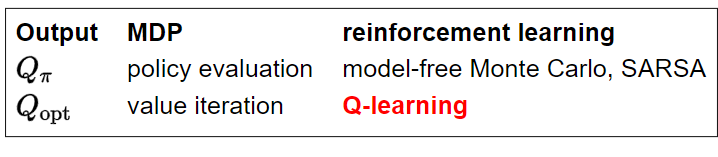

In [54]:
display(Image(filename='./2_imagenes/MDP_RL.png', width=600))

¿Podemos obtener una estimación de $Q_{opt}$ sin modelo? La respuesta es sí, y **Q-learning** es el algoritmo que logra esto.


### Q-Learning

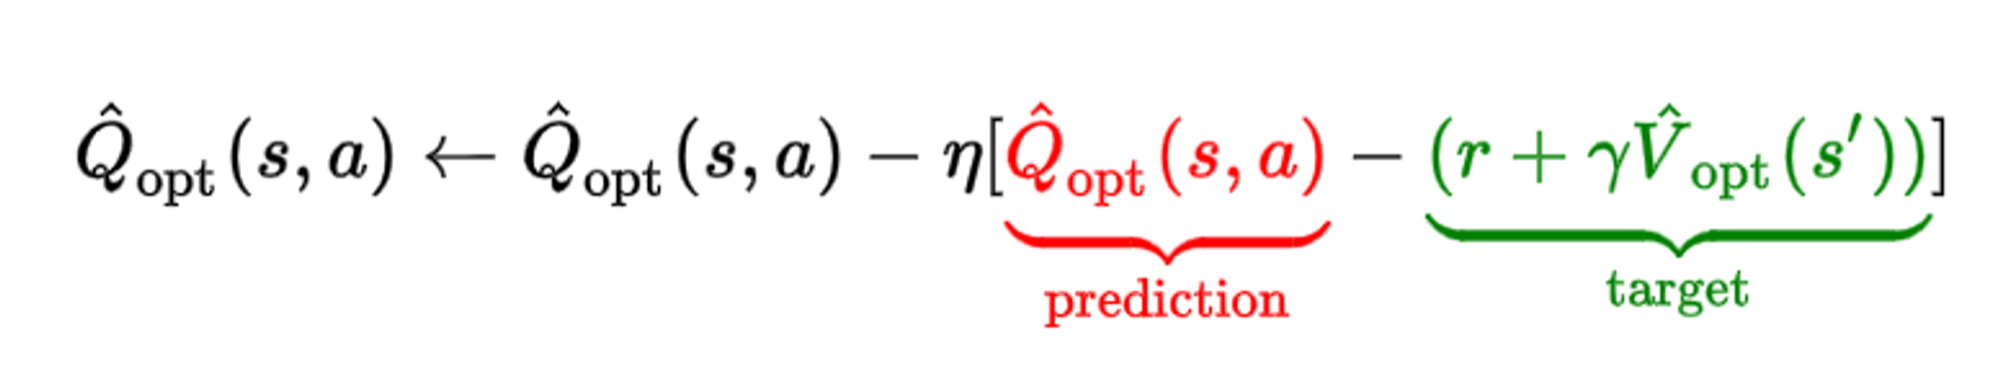

In [55]:
display(Image(filename='./2_imagenes/Q_learning.png', width=800))